In [1]:
import copy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils.plot_utils import set_fontsize
from utils.hdf_utils import load_measurement_data_devices_attrs

In [2]:
fname = "2021_1_28.hdf"
dset_names = [
    "1611873822 check correlation absorption and fluorescence"
]
devices = {}

In [19]:
integrals_pmt = []
integrals_pd = []
integrals_normalized = []

mask_abs = np.s_[:750]
mask_flu = np.s_[100:]

for dset_name in dset_names:
    pmt_channel = 1
    pd_channel = 2
    pdn_channel = 3

    pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

    print(f'{len(pxie)} samples')

    n = pxie[1].shape[0]

    t = np.arange(0,n,1)/100

    pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
    pd_data = -np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
    pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])

    integrals_pmt.append(np.trapz((pmt_data - pmt_data[:,50:200].mean(axis = 1)[:,np.newaxis])[:,mask_flu], axis = 1))
    integrals_pd.append(np.trapz((pd_data - pd_data[:,-750:].mean(axis = 1)[:,np.newaxis])[:,mask_abs], axis = 1))
    norm = pd_data/pdn_data
    norm -= norm[:,-750:].mean(axis = 1)[:,np.newaxis]
    integrals_normalized.append(np.trapz(norm[:,mask_abs], axis = 1))

1610 samples


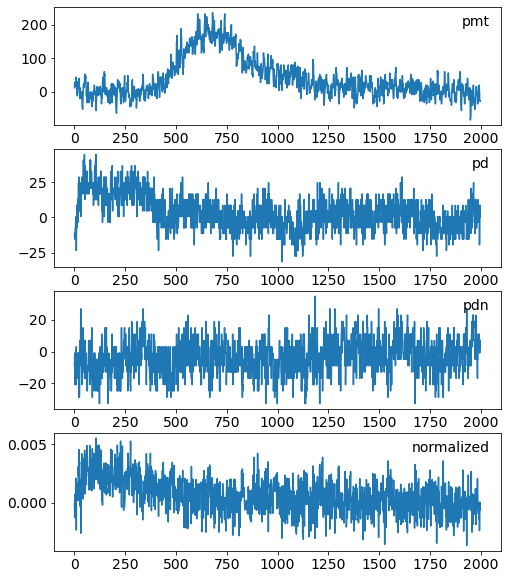

In [20]:
idx = np.argmax(integrals_pmt)
fig, axes = plt.subplots(figsize = (8,10), nrows = 4)
axes[0].plot((pmt_data[idx] - pmt_data[idx,:300].mean()).T)
axes[1].plot((pd_data[idx] - pd_data[idx,-750:].mean()).T)
axes[2].plot((-pdn_data[idx] + pdn_data[idx,-750:].mean()).T)
axes[3].plot(norm[idx].T)

for ax, name in zip(axes, ['pmt', 'pd', 'pdn', 'normalized']):
    ax.text(0.975, 0.93, name, transform = ax.transAxes, fontsize = 14,
                  va = 'top', ha = 'right')
    set_fontsize(ax, 14)

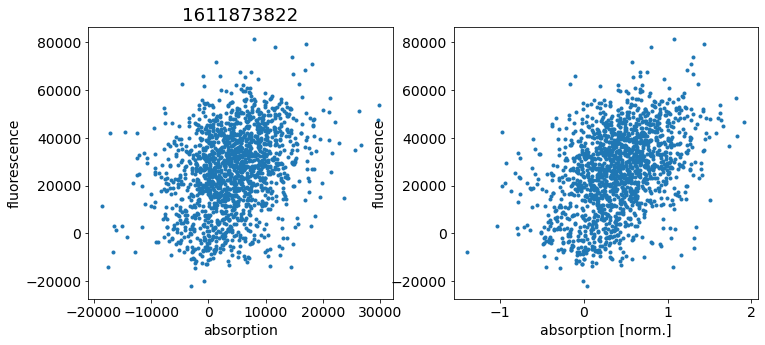

In [21]:
for idx, name in enumerate(dset_names):
    fig, axes = plt.subplots(ncols = 2, figsize = (12,5))
    axes[0].plot(integrals_pd[idx], integrals_pmt[idx], '.')
    axes[1].plot(integrals_normalized[idx], integrals_pmt[idx], '.')
    axes[0].set_title(name.split(' ')[0])
    for ax in axes:
        set_fontsize(ax, 14)
        
    axes[0].set_xlabel('absorption')
    axes[1].set_xlabel('absorption [norm.]')
    axes[0].set_ylabel('fluorescence')
    axes[1].set_ylabel('fluorescence')

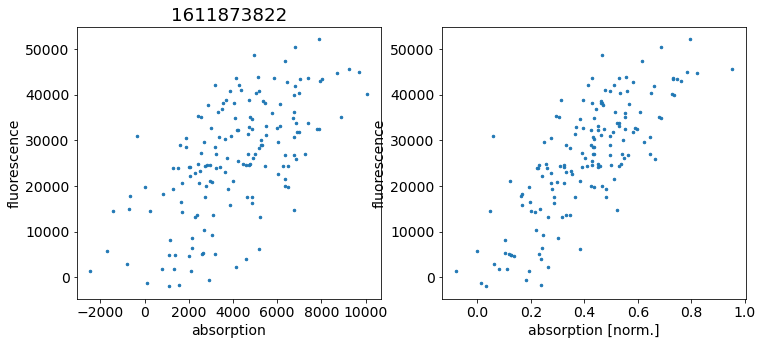

In [22]:
nbunch = 10
for idx, name in enumerate(dset_names):
    fig, axes = plt.subplots(ncols = 2, figsize = (12,5))
    axes[0].plot(integrals_pd[idx].reshape(-1,nbunch).mean(axis = 1), integrals_pmt[idx].reshape(-1,nbunch).mean(axis = 1), '.', ms = 5)
    axes[1].plot(integrals_normalized[idx].reshape(-1,nbunch).mean(axis = 1), integrals_pmt[idx].reshape(-1,nbunch).mean(axis = 1), '.', ms = 5)
    axes[0].set_title(name.split(' ')[0])
    axes[0].set_xlabel('absorption')
    axes[1].set_xlabel('absorption [norm.]')
    axes[0].set_ylabel('fluorescence')
    axes[1].set_ylabel('fluorescence')
    for ax in axes:
        set_fontsize(ax, 14)

In [23]:
yag_channel = 0
yag_data = np.array([pxie[idx][:,yag_channel].astype(float) for idx in range(1,len(pxie)+1)])

Text(0, 0.5, 'shots')

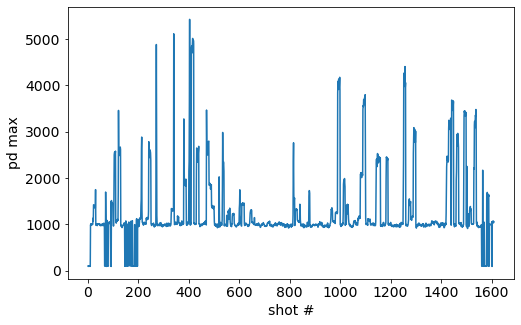

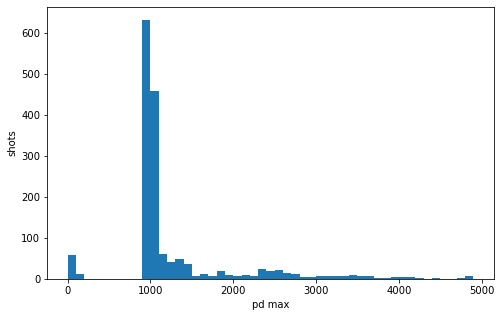

In [41]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(yag_data[:,:100].max(axis = 1))

ax.set_xlabel('shot #')
ax.set_ylabel('pd max')
set_fontsize(ax,14)

bins = np.arange(0,5000,100)
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(yag_data[:,:100].max(axis = 1), bins = bins)
ax.set_xlabel('pd max')
ax.set_ylabel('shots')

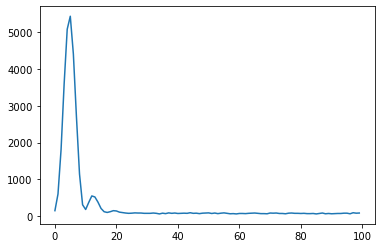

In [37]:
plt.plot(yag_data[yag_data.max(axis = 1).argmax()][:100])

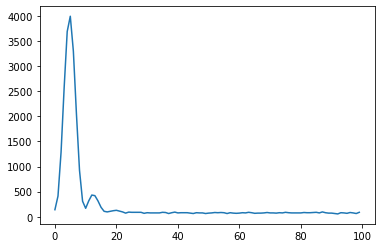

In [62]:
plt.plot(yag_data[np.random.randint(len(yag_data))][:100])